In [127]:
import numpy as np
import matplotlib.pyplot as plt

In [128]:
def gernerate_linear(n=100):
    pts = np.random.uniform(0, 1, (n, 2))
    inputs = []
    labels = []
    for pt in pts:
        inputs.append([pt[0], pt[1]])
        distance = (pt[0] - pt[1])/1.414
        if pt[0] > pt[1]:
            labels.append(0)
        else:
            labels.append(1)
    return np.array(inputs), np.array(labels).reshape(n, 1)

def generate_XOR_easy():
    inputs = []
    labels = []
    for i in range(11):
        inputs.append([0.1 * i, 0.1 * i])
        labels.append(0)
        if 0.1 * i == 0.5:
            continue
        inputs.append([0.1*i, 1-0.1*i])
        labels.append(1)
    return np.array(inputs), np.array(labels).reshape(21, 1)


In [129]:
class Model:
    def __init__(self):
        self.input_size = 2
        self.hidden1_size = 5
        self.hidden2_size = 5
        self.output_size = 1
        
        self.weights1 = np.random.rand(self.input_size, self.hidden1_size)
        self.weights2 = np.random.rand(self.hidden1_size, self.hidden2_size)
        self.weights3 = np.random.rand(self.hidden2_size, self.output_size)
        
        self.bias1 = 0.001
        self.bias2 = 0.001
        self.bias3 = 0.001
        
        # momentum optimizer
        self.beta = 0.9
        self.m_w1 = 0 # momemtum vector for weight
        self.m_b1 = 0 # momemtum vector for bias
        self.m_w2 = 0 
        self.m_b2 = 0
        self.m_w3 = 0 
        self.m_b3 = 0
        
        self.hidden1_output = ()
        self.hidden2_output = ()
        self.y = ()
        
        self.learning_rate = 0.0001
        
        # 照理來說要用for loop把x一個個送進來，但可以直接用矩陣乘法加速

    def sigmoid(self, x):
        return 1/(1 + np.exp(-x))
    
    def sigmoid_derivatives(self, x):
        return x * (1-x)

    def ReLU(self, x):
        return np.maximum(0, x)
    
    def ReLU_derivatives(self, x):
        return 1 * (x > 0)

    def forward(self, x):
        self.hidden1_output = self.sigmoid(np.dot(x, self.weights1) + self.bias1)
        self.hidden2_output = self.sigmoid(np.dot(self.hidden1_output, self.weights2) + self.bias2)
        self.y = self.sigmoid(np.dot(self.hidden2_output, self.weights3) + self.bias3)
        
        return np.where(self.y > 0.5, 1, 0)
    
    def back_propagation(self, x, y_gt):
        ##### back propagation
        y_error = (self.y - y_gt) # derivatives of loss function: (1/2)*sum((y - y_gt)**2)
        
        tmp = np.dot(y_error, self.sigmoid_derivatives(self.y))
        
        self.weights3 -= self.learning_rate * np.dot(self.hidden2_output.T, tmp)
        
        
        hidden2_error = np.dot(tmp, self.weights3.T)
        tmp = np.dot(hidden2_error, self.sigmoid_derivatives(self.hidden2_output))
        self.weights2 -= self.learning_rate * np.dot(self.hidden1_output.T, hidden2_error)
        
        hidden1_error = np.dot(hidden2_error, self.weights2.T)
        tmp = np.dot(hidden1_error, self.sigmoid_derivatives(self.hidden1_output))
        self.weights1 -= self.learning_rate * np.dot(x.T, hidden1_error)
        
        return (1/2) * np.sum((self.y - y_gt)**2) # loss function
    
    def forward2(self, x):
        self.hidden1_output = self.ReLU(np.dot(x, self.weights1) + self.bias1)
        # print(self.hidden1_output.shape)
        self.hidden2_output = self.sigmoid(np.dot(self.hidden1_output, self.weights2) + self.bias2)
        # print(self.hidden2_output.shape)
        self.y = self.sigmoid(np.dot(self.hidden2_output, self.weights3) + self.bias3)
        # print(self.y.shape)
        return np.where(self.y > 0.5, 1, 0)
    
    def back_propagation2(self, x, y_gt):
        ##### back propagation
        y_error = (self.y - y_gt)
        
        tmp = y_error * self.sigmoid_derivatives(self.y)
        self.weights3 -= self.learning_rate * np.dot(self.hidden2_output.T, tmp) 
        self.bias3 -= self.learning_rate * 1 * tmp
        
        hidden2_error = np.dot(tmp, self.weights3.T)
        tmp = hidden2_error * self.sigmoid_derivatives(self.hidden2_output)
        self.weights2 -= self.learning_rate * np.dot(self.hidden1_output.T, hidden2_error)
        self.bias2 -= self.learning_rate * 1 * tmp
        
        hidden1_error = np.dot(hidden2_error, self.weights2.T)
        tmp = hidden1_error * self.ReLU_derivatives(self.hidden1_output)
        self.weights1 -= self.learning_rate * np.dot(x.T, tmp)
        self.bias1 -= self.learning_rate * 1 * tmp
        
        return (1/2) * np.sum((self.y - y_gt)**2)
    
    def momentumOptimizer(self, gradient_w, gradient_b, beta=0.9):
        self.m_w = beta * self.m_w - self.learning_rate * gradient_w
        self
        

        
    
    def back_propagation_momentum(self, x, y_gt):
        ##### back propagation
        y_error = (self.y - y_gt)
        tmp = y_error * self.sigmoid_derivatives(self.y)
        self.m_w3 = self.beta * self.m_w3 - self.learning_rate * np.dot(self.hidden2_output.T, tmp)
        self.m_b3 = self.beta * self.m_b3 - self.learning_rate * tmp
        self.weights3 += self.m_w3
        self.bias3 += self.m_b3
        
        hidden2_error = np.dot(tmp, self.weights3.T)
        tmp = hidden2_error * self.sigmoid_derivatives(self.hidden2_output)
        self.m_w2 = self.beta * self.m_w2 - self.learning_rate * np.dot(self.hidden1_output.T, tmp)
        self.m_b2 = self.beta * self.m_b2 - self.learning_rate * tmp
        self.weights2 += self.m_w2
        self.bias2 += self.m_b2
        
        hidden1_error = np.dot(hidden2_error, self.weights2.T)
        tmp = hidden1_error * self.ReLU_derivatives(self.hidden1_output)
        self.m_w1 = self.beta * self.m_w1 - self.learning_rate * np.dot(x.T, tmp)
        self.m_b1 = self.beta * self.m_b1 - self.learning_rate * tmp
        self.weights1 += self.m_w1
        self.bias1 += self.m_b1
        
        return (1/2) * np.sum((self.y - y_gt)**2)


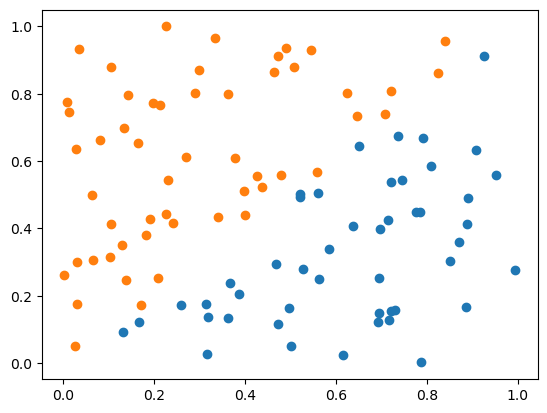

In [130]:
# figure, axis = plt.subplots(2)
x, y = gernerate_linear(n=100)
for i in [0, 1]:
    plt.scatter(x=x[np.where(y[:, 0] == i), 0], y=x[np.where(y[:, 0] == i), 1])
plt.show()

In [131]:
epochs = 20000   
model = Model()

for epoch in range(epochs):
    y_test = model.forward2(x)
    loss = model.back_propagation2(x, y)
    if(epoch % 10000 == 0):
        print(f"epoch: {epoch} | {epochs}")
        print("accuracy: ", sum(1 for i, j in zip(y, y_test) if i == j) / len(y))
        print("loss: ", loss)

y_pred = model.forward2(x)
print("accuracy: ", sum(1 for i, j in zip(y, y_pred) if i == j) / len(y))

epoch: 0 | 20000
accuracy:  0.53
loss:  18.990785504977836
epoch: 10000 | 20000
accuracy:  0.57
loss:  10.633738493494183
accuracy:  0.98


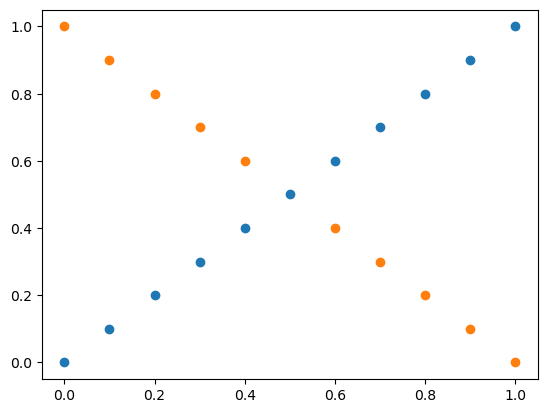

In [132]:
x, y = generate_XOR_easy()
for i in [0, 1]:
    plt.scatter(x=x[np.where(y[:, 0] == i), 0], y=x[np.where(y[:, 0] == i), 1])
plt.show()

In [133]:
epochs = 100000   
model = Model()
model.learning_rate = 0.0001

for epoch in range(epochs):
    y_test = model.forward2(x)
    loss = model.back_propagation_momentum(x, y)
    if(epoch % 10000 == 0):
        print(f"epoch: {epoch} | {epochs}")
        print("accuracy: ", sum(1 for i, j in zip(y, y_test) if i == j) / len(y))
        print("loss: ", loss)

y_pred = model.forward2(x)
print("accuracy: ", sum(1 for i, j in zip(y, y_pred) if i == j) / len(y))

epoch: 0 | 100000
accuracy:  0.47619047619047616
loss:  4.264012866959229
epoch: 10000 | 100000
accuracy:  1.0
loss:  0.4065914547044743
epoch: 20000 | 100000
accuracy:  1.0
loss:  0.0597803443363614
epoch: 30000 | 100000
accuracy:  1.0
loss:  0.027073770048199438
epoch: 40000 | 100000
accuracy:  1.0
loss:  0.016589591453735328
epoch: 50000 | 100000
accuracy:  1.0
loss:  0.011598993218079005
epoch: 60000 | 100000
accuracy:  1.0
loss:  0.008789072778940291
epoch: 70000 | 100000
accuracy:  1.0
loss:  0.007029792914777761
epoch: 80000 | 100000
accuracy:  1.0
loss:  0.005827820646557351
epoch: 90000 | 100000
accuracy:  1.0
loss:  0.004962339275779589
accuracy:  1.0
